# Explore Filter Parameters
First importing the necessary libraries.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import lfp_functions as lf

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})
                    

Loading the data.

In [35]:
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


First the signal is plotted using three different frequency filters, filtering out the theta (8-12 Hz), gamma (20-45 Hz) and fast gamma (100-140 Hz) components.

In [36]:
from scipy.signal import butter
from scipy.signal import sosfilt

44.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


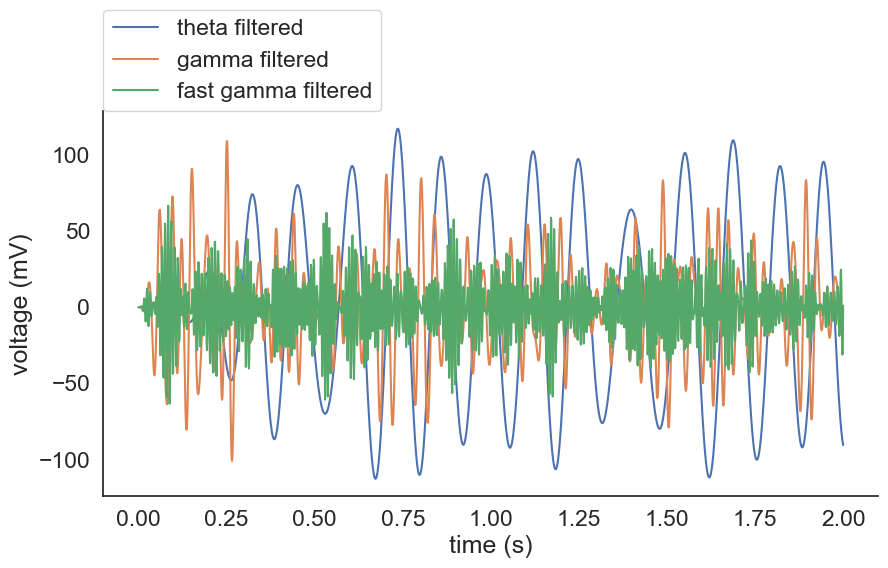

In [37]:
%%timeit -r 1 -n 1

filter_order = 5

th_low_f = 6
th_high_f = 10

gam_low_f = 20
gam_high_f = 40

fgam_low_f = 100
fgam_high_f = 140


#define filter
def filter(low_f, high_f):
    fil = butter(filter_order,[low_f,high_f], btype='band', output='sos', fs=sampling_rate)
    return fil
                
#apply filter to lfp       
theta_lfp = sosfilt(filter(th_low_f,th_high_f), lfp)
gamma_lfp = sosfilt(filter(gam_low_f, gam_high_f), lfp)
fastgamma_lfp = sosfilt(filter(fgam_low_f, fgam_high_f), lfp)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),theta_lfp[:2000],label = 'theta filtered')
plt.plot(np.linspace(0,2,2000),gamma_lfp[:2000],label = 'gamma filtered')
plt.plot(np.linspace(0,2,2000),fastgamma_lfp[:2000],label = 'fast gamma filtered')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.legend(loc=(0,1))

The difference in frequency is clearly visible in the plot. Also a difference in amplitude is observed. For increasing frequency the amplitude decreases on average.

Now keeping the central frequency at the constant value for the gamma component (32.5 Hz) and varying the band with from 20-45 Hz to 15-50 Hz and 5-60 Hz.

87.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


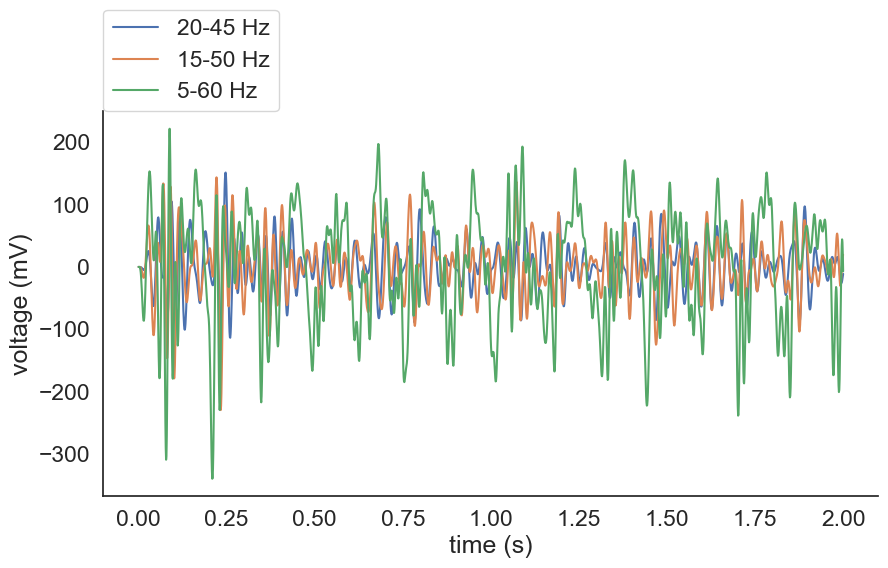

In [38]:
%%timeit -r 1 -n 1

gam_low_f1 = 20
gam_high_f1 = 45

gam_low_f2 = 15
gam_high_f2 = 50

gam_low_f3 = 5
gam_high_f3 = 60


#define filter object
def filter(low_f, high_f):
    fil = butter(filter_order,[low_f,high_f], btype='band', output='sos', fs=sampling_rate)
    return fil
                
#apply filter to lfp       
gamma_lfp1 = sosfilt(filter(gam_low_f1,gam_high_f1), lfp)
gamma_lfp2 = sosfilt(filter(gam_low_f2, gam_high_f2), lfp)
gamma_lfp3 = sosfilt(filter(gam_low_f3, gam_high_f3), lfp)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),gamma_lfp1[:2000],label = '20-45 Hz')
plt.plot(np.linspace(0,2,2000),gamma_lfp2[:2000],label = '15-50 Hz')
plt.plot(np.linspace(0,2,2000),gamma_lfp3[:2000],label = '5-60 Hz')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.legend(loc=(0,1))

Again an amplitude difference is observed, especially for the widest bandwidth.

Now the bandwidth of the filter is kept constant while varying the central frequency (32.5, 42.5 and 62.5 Hz).

As expected an increase in frequency of the singal is observed with increasing central frquency. Also the highedt central frequency has in general the highest amplitude.

Lastly the filter order of the frequency filter is varied to 5, 50 and 100 (smaller changes would give no significant change in the plot and for values above 250 a runtime error would occur).

41.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


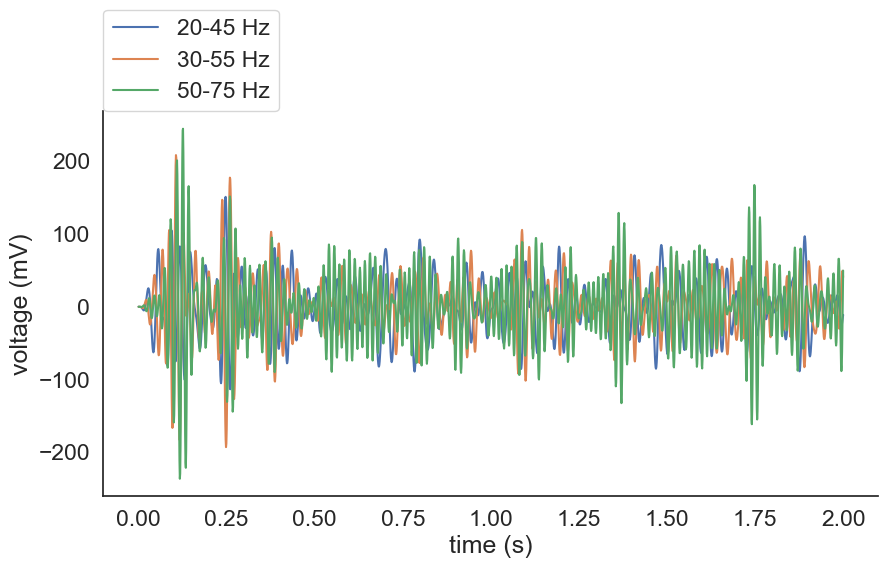

In [39]:
%%timeit -r 1 -n 1

gam_low_f1 = 20
gam_high_f1 = 45

gam_low_f2 = 30
gam_high_f2 = 55

gam_low_f3 = 50
gam_high_f3 = 75


#define filter object
def filter(low_f, high_f):
    fil = butter(filter_order,[low_f,high_f], btype='band', output='sos', fs=sampling_rate)
    return fil
                
#apply filter to lfp       
gamma_lfp1 = sosfilt(filter(gam_low_f1,gam_high_f1), lfp)
gamma_lfp2 = sosfilt(filter(gam_low_f2, gam_high_f2), lfp)
gamma_lfp3 = sosfilt(filter(gam_low_f3, gam_high_f3), lfp)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),gamma_lfp1[:2000],label = '20-45 Hz')
plt.plot(np.linspace(0,2,2000),gamma_lfp2[:2000],label = '30-55 Hz')
plt.plot(np.linspace(0,2,2000),gamma_lfp3[:2000],label = '50-75 Hz')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.legend(loc=(0,1))

In [45]:
%%timeit -r 1 -n 1

gam_low_f = 20
gam_high_f = 45


#define filter object
def filter(low_f, high_f, filter_order):
    fil = butter(filter_order,[low_f,high_f], btype='band', output='sos', fs=sampling_rate)
    return fil
                
#apply filter to lfp       
gamma_lfp5 = sosfilt(filter(gam_low_f, gam_high_f, 5), lfp)
gamma_lfp50 = sosfilt(filter(gam_low_f, gam_high_f, 50), lfp)
gamma_lfp100 = sosfilt(filter(gam_low_f, gam_high_f, 100), lfp)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),gamma_lfp5[:2000],label = 'order 5') 
plt.plot(np.linspace(0,2,2000),gamma_lfp50[:2000],label = 'order 50') 
plt.plot(np.linspace(0,2,2000),gamma_lfp100[:2000],label = 'order 100')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.legend(loc=(0,1))

287 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


The three singals are very similiar. The only noticable difference is the signal appears to start later the higher the order is.

Applying the different order filters separately below to view computing times.

In [46]:
%%timeit -r 1 -n 1

gam_low_f = 20
gam_high_f = 45

def filter(low_f, high_f, filter_order):
    fil = butter(filter_order,[low_f,high_f], btype='band', output='sos', fs=sampling_rate)
    return fil
 
gamma_lfp5 = sosfilt(filter(gam_low_f, gam_high_f, 5), lfp)

9.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [47]:
%%timeit -r 1 -n 1

gam_low_f = 20
gam_high_f = 45

def filter(low_f, high_f, filter_order):
    fil = butter(filter_order,[low_f,high_f], btype='band', output='sos', fs=sampling_rate)
    return fil
                
gamma_lfp50 = sosfilt(filter(gam_low_f, gam_high_f, 50), lfp)

102 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [48]:
%%timeit -r 1 -n 1

gam_low_f = 20
gam_high_f = 45

def filter(low_f, high_f, filter_order):
    fil = butter(filter_order,[low_f,high_f], btype='band', output='sos', fs=sampling_rate)
    return fil

gamma_lfp100 = sosfilt(filter(gam_low_f, gam_high_f, 100), lfp)

187 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


The 5th order takes ~10 ms, the 50th order takes ~100 ms and the 100th order takes ~200 ms. From this it looks like the computing time is increasing linearly with respect to the order of the filter.